In [241]:
#importing seemingly important/necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [242]:
#loading datasets, chosen from the available finance companies randomly
AFL = pd.read_csv("AFL.csv")
BK = pd.read_csv("BK.csv")



In [243]:

# Convert the datetime column to datetime format
AFL['datetime'] = pd.to_datetime(AFL['Date'], utc=True)
BK['datetime'] = pd.to_datetime(BK['Date'], utc=True)

# Extract the date part
AFL['date'] = AFL['datetime'].dt.strftime('%Y-%m-%d')
BK['date'] = BK['datetime'].dt.strftime('%Y-%m-%d')

# Extract the time part
AFL['time'] = AFL['datetime'].dt.strftime('%H:%M:%S')
BK['time'] = BK['datetime'].dt.strftime('%H:%M:%S')



In [244]:
#dropping the datetime and date columns since they are not important
drop =['datetime','Date']
AFL.drop(columns=drop,inplace=True)
BK.drop(columns=drop,inplace=True)


In [245]:
#extracting the exact year from the date column
AFL['year']=pd.to_datetime(AFL['date'], format = '%Y-%m-%d').dt.year
BK['year']=pd.to_datetime(BK['date'], format = '%Y-%m-%d').dt.year

In [246]:
#limiting the dataset to years 2019-2023 (most recent 5 years)
afl = AFL[AFL['year']>2018] 
bk = BK[BK['year']>2018]

In [247]:
afl['Source'] = 'afl'
bk['Source'] = 'bk'

merged1 = pd.concat([afl, bk], ignore_index=True)

merged1

/var/folders/9b/lcnf6chx0g14t5dymgppkdcw0000gn/T/ipykernel_4878/1311253690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  afl['Source'] = 'afl'
/var/folders/9b/lcnf6chx0g14t5dymgppkdcw0000gn/T/ipykernel_4878/1311253690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bk['Source'] = 'bk'


,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,time,year,Source
0,39.695221,40.576547,39.641806,40.523132,4022100,0.0,0.0,2019-01-02,05:00:00,2019,afl
1,40.389601,40.576552,39.419254,39.499374,4239700,0.0,0.0,2019-01-03,05:00:00,2019,afl
2,40.078016,40.282767,39.784239,39.988991,4761500,0.0,0.0,2019-01-04,05:00:00,2019,afl
3,39.962290,40.612156,39.784244,40.202652,3414400,0.0,0.0,2019-01-07,05:00:00,2019,afl
4,40.514236,40.656673,39.908885,40.327290,3017000,0.0,0.0,2019-01-08,05:00:00,2019,afl
...,...,...,...,...,...,...,...,...,...,...,...
2373,45.419998,45.619999,45.000000,45.209999,16216000,0.0,0.0,2023-09-15,04:00:00,2023,bk
2374,45.060001,45.099998,44.590000,44.799999,3872200,0.0,0.0,2023-09-18,04:00:00,2023,bk
2375,44.810001,44.959999,44.049999,44.119999,3372800,0.0,0.0,2023-09-19,04:00:00,2023,bk
2376,44.360001,44.520000,43.650002,43.700001,4151400,0.0,0.0,2023-09-20,04:00:00,2023,bk


In [248]:
finalstock = merged1.sort_values(by='year')

#mer.reset_index(drop=True, inplace=True)
finalstock.reset_index(drop=True, inplace=True)
finalstock


,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,time,year,Source
0,39.695221,40.576547,39.641806,40.523132,4022100,0.0,0.0,2019-01-02,05:00:00,2019,afl
1,37.983149,38.124679,37.682397,38.062759,3388900,0.0,0.0,2019-09-06,04:00:00,2019,bk
2,38.310441,40.513002,38.186600,40.229942,7858900,0.0,0.0,2019-09-09,04:00:00,2019,bk
3,40.486475,40.911065,40.061885,40.495319,5969900,0.0,0.0,2019-09-10,04:00:00,2019,bk
4,40.654534,41.008361,40.070722,40.990669,3986700,0.0,0.0,2019-09-11,04:00:00,2019,bk
...,...,...,...,...,...,...,...,...,...,...,...
2373,66.820900,67.586560,66.204403,67.149040,2960500,0.0,0.0,2023-06-21,04:00:00,2023,afl
2374,68.531195,68.610746,67.337968,67.417519,2914900,0.0,0.0,2023-06-20,04:00:00,2023,afl
2375,69.485781,69.883526,68.928942,69.038322,5587600,0.0,0.0,2023-06-16,04:00:00,2023,afl
2376,69.257079,69.823864,68.183170,68.372101,2470700,0.0,0.0,2023-06-14,04:00:00,2023,afl


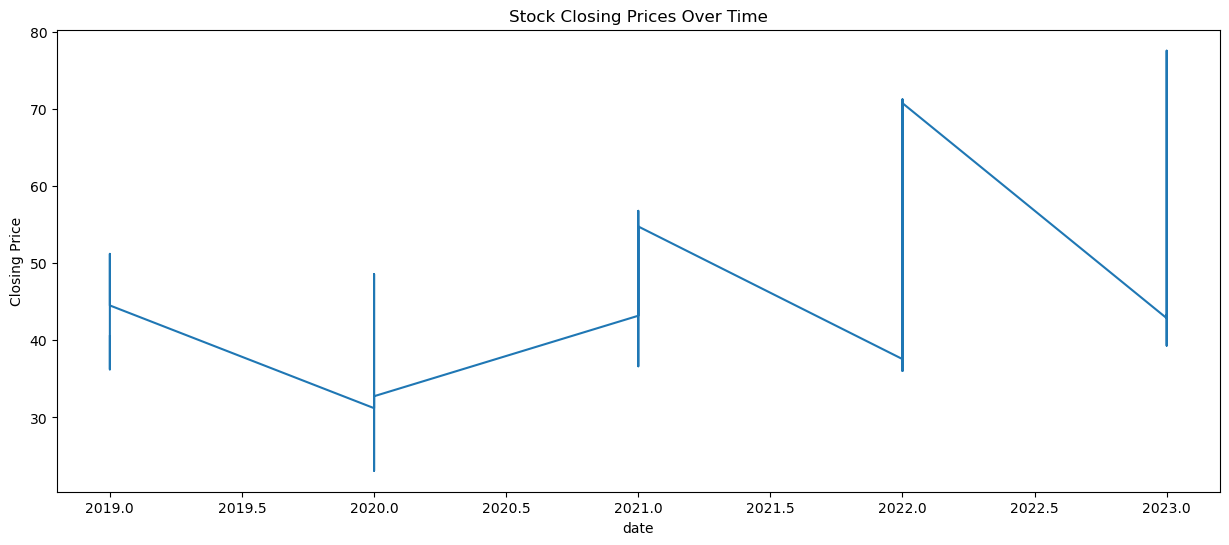

In [249]:
plt.figure(figsize=(15,6))
plt.plot(finalstock.year, finalstock.Close) 
plt.title('Stock Closing Prices Over Time')
plt.xlabel('date')  # Label for the x-axis
plt.ylabel('Closing Price')  # Label for the y-axis
plt.show() 

# This is a graph showing the closing stocks over time, after choosing the most recent years there’s a cyclic pattern with a lot of noticeable peaks and troughs

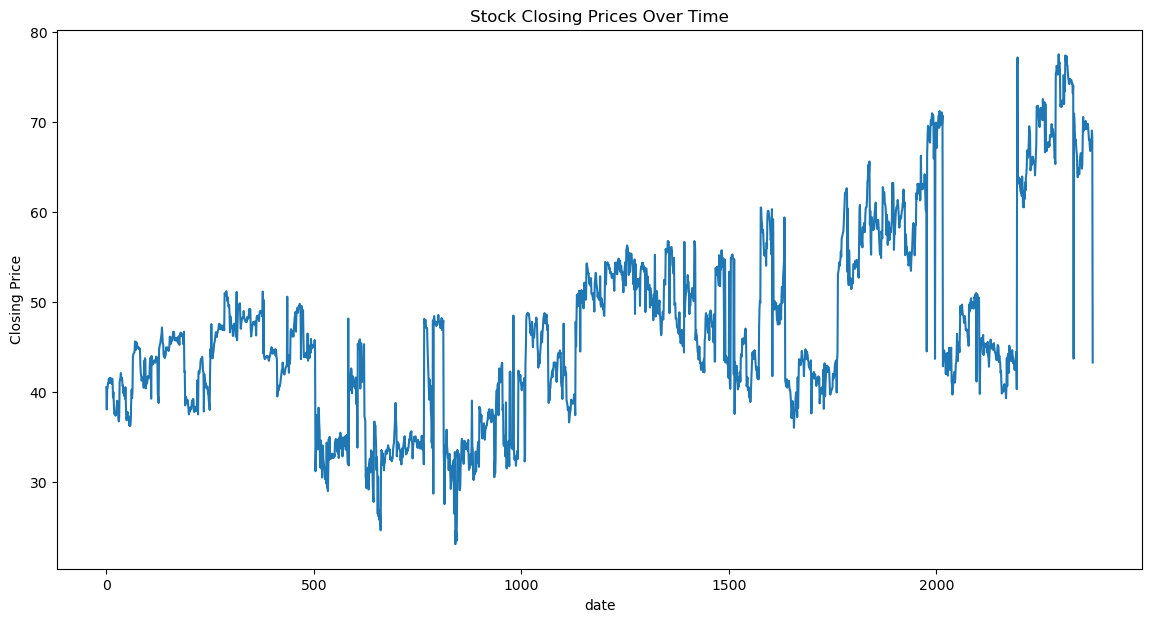

In [250]:
finalstock['Close'].plot(figsize=(14, 7))
plt.title('Stock Closing Prices Over Time')
plt.xlabel('date')  # Label for the x-axis
plt.ylabel('Closing Price')  # Label for the y-axis
plt.show()


# The stock exhibits volatility, showing constant fluctuations in price, the spikes in the graph also indicate rapid price changes over periods

In [251]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(finalstock['Close'], order=(5, 1, 0))
model_fit = model.fit()


In [252]:
#For XGboost
#finalstock1=finalstock
finalstock['Close_lag1'] = finalstock['Close'].shift(1)
finalstock['Close_lag2'] = finalstock['Close'].shift(2)
finalstock.dropna(inplace=True)
finalstock

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,time,year,Source,Close_lag1,Close_lag2
2,38.310441,40.513002,38.186600,40.229942,7858900,0.0,0.0,2019-09-09,04:00:00,2019,bk,38.062759,40.523132
3,40.486475,40.911065,40.061885,40.495319,5969900,0.0,0.0,2019-09-10,04:00:00,2019,bk,40.229942,38.062759
4,40.654534,41.008361,40.070722,40.990669,3986700,0.0,0.0,2019-09-11,04:00:00,2019,bk,40.495319,40.229942
5,40.804905,41.185267,40.442234,40.964127,3106600,0.0,0.0,2019-09-12,04:00:00,2019,bk,40.990669,40.495319
6,41.468324,41.724844,41.202955,41.486015,3209600,0.0,0.0,2019-09-13,04:00:00,2019,bk,40.964127,40.990669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,66.820900,67.586560,66.204403,67.149040,2960500,0.0,0.0,2023-06-21,04:00:00,2023,afl,67.158981,66.761238
2374,68.531195,68.610746,67.337968,67.417519,2914900,0.0,0.0,2023-06-20,04:00:00,2023,afl,67.149040,67.158981
2375,69.485781,69.883526,68.928942,69.038322,5587600,0.0,0.0,2023-06-16,04:00:00,2023,afl,67.417519,67.149040
2376,69.257079,69.823864,68.183170,68.372101,2470700,0.0,0.0,2023-06-14,04:00:00,2023,afl,69.038322,67.417519


In [253]:
finalstock['Close_roll_mean'] = finalstock['Close'].rolling(window=5).mean()
finalstock['Close_roll_std'] = finalstock['Close'].rolling(window=5).std()
finalstock.dropna(inplace=True)
finalstock

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,time,year,Source,Close_lag1,Close_lag2,Close_roll_mean,Close_roll_std
6,41.468324,41.724844,41.202955,41.486015,3209600,0.0,0.0,2019-09-13,04:00:00,2019,bk,40.964127,40.990669,40.833215,0.486361
7,41.026045,41.574473,40.813748,41.353333,2811500,0.0,0.0,2019-09-16,04:00:00,2019,bk,41.486015,40.964127,41.057893,0.387419
8,40.185711,41.017200,40.123792,40.999508,4949200,0.0,0.0,2019-09-17,04:00:00,2019,bk,41.353333,41.486015,41.158730,0.243132
9,41.017206,41.786779,40.627999,41.574482,4656500,0.0,0.0,2019-09-18,04:00:00,2019,bk,40.999508,41.353333,41.275493,0.279683
10,41.530246,41.972528,41.264878,41.556782,3252500,0.0,0.0,2019-09-19,04:00:00,2019,bk,41.574482,40.999508,41.394024,0.237074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,66.820900,67.586560,66.204403,67.149040,2960500,0.0,0.0,2023-06-21,04:00:00,2023,afl,67.158981,66.761238,67.276318,0.500570
2374,68.531195,68.610746,67.337968,67.417519,2914900,0.0,0.0,2023-06-20,04:00:00,2023,afl,67.149040,67.158981,67.137108,0.236818
2375,69.485781,69.883526,68.928942,69.038322,5587600,0.0,0.0,2023-06-16,04:00:00,2023,afl,67.417519,67.149040,67.505020,0.888587
2376,69.257079,69.823864,68.183170,68.372101,2470700,0.0,0.0,2023-06-14,04:00:00,2023,afl,69.038322,67.417519,67.827193,0.842317


In [254]:
from sklearn.model_selection import train_test_split

features = ['Close_lag1', 'Close_lag2', 'Close_roll_mean', 'Close_roll_std']
X = finalstock[features]
y = finalstock['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [255]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error



xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xg_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xg_reg.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"XGBoost RMSE: {rmse_xgb}")


XGBoost RMSE: 5.649324060881927


In [256]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(finalstock[['Close']])

# Create sequences for the CNN
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:(i + seq_length)]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X_seq, y_seq = create_sequences(scaled_data, seq_length)

# Split into training and test sets
split = int(0.8 * len(X_seq))
X_train_seq, X_test_seq = X_seq[:split], X_seq[split:]
y_train_seq, y_test_seq = y_seq[:split], y_seq[split:]


In [257]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout


In [258]:
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50


/Users/omolade/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0266 - val_loss: 0.0077
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 0.0070 - val_loss: 0.0045
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.0056 - val_loss: 0.0036
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.0052 - val_loss: 0.0030
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 0.0052 - val_loss: 0.0050
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 0.0047 - val_loss: 0.0029
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 0.0043 - val_loss: 0.0039
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.0048 - val_loss: 0.0025
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.0042 - val_loss: 0.0026
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step - loss: 0.0041 - val_loss: 0.0025
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 0.0044 - val_loss: 0.0022
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0037

In [259]:
# Predict and evaluate
y_pred_cnn = model.predict(X_test_seq)
y_pred_cnn = scaler.inverse_transform(y_pred_cnn)

# Inverse transform y_test_seq for comparison
y_test_seq_inv = scaler.inverse_transform(y_test_seq.reshape(-1, 1))

rmse_cnn = np.sqrt(mean_squared_error(y_test_seq_inv, y_pred_cnn))
print(f"CNN RMSE: {rmse_cnn}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
CNN RMSE: 5.6399274922253815


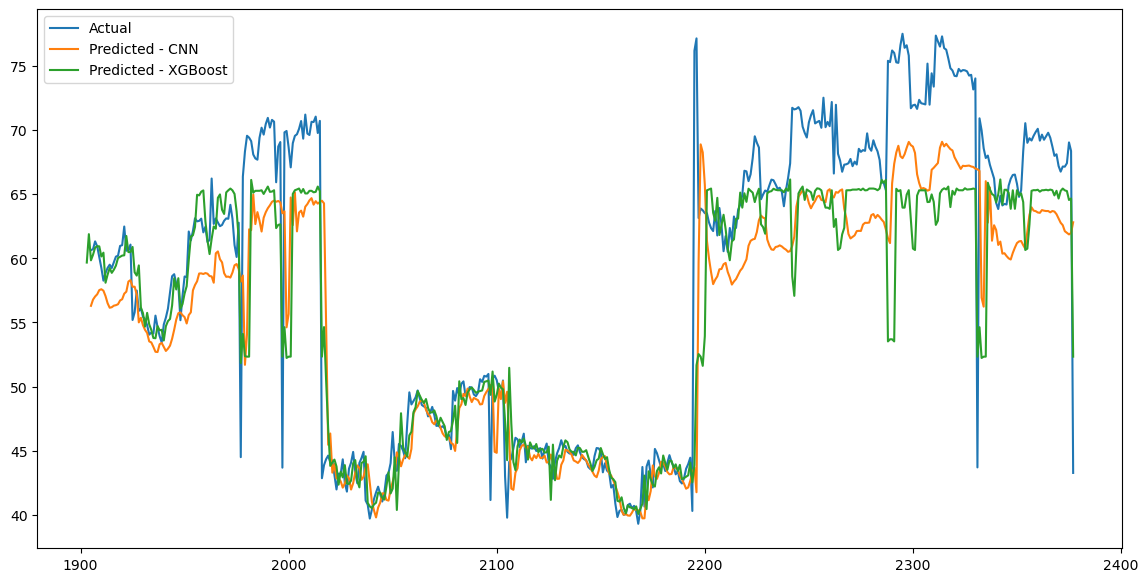

In [260]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(finalstock.index[-len(y_test_seq):], y_test_seq_inv, label='Actual')
plt.plot(finalstock.index[-len(y_test_seq):], y_pred_cnn, label='Predicted - CNN')
plt.plot(finalstock.index[-len(y_test):], y_pred_xgb, label='Predicted - XGBoost')
plt.legend()
plt.show()

In [261]:
#calculating evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics for CNN
mae_cnn = mean_absolute_error(y_test_seq_inv, y_pred_cnn)
mse_cnn = mean_squared_error(y_test_seq_inv, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)

# Calculate evaluation metrics for XGBoost
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f'CNN MAE: {mae_cnn}, CNN RMSE: {rmse_cnn}')
print(f'XGBoost MAE: {mae_xgb}, XGBoost RMSE: {rmse_xgb}')

CNN MAE: 4.017269239365173, CNN RMSE: 5.6399274922253815
XGBoost MAE: 3.429594108179996, XGBoost RMSE: 5.649324060881927


In [264]:
# Load the new validation dataset
USB= pd.read_csv('USB.csv')
WELL= pd.read_csv('WELL.csv')

USB['datetime'] = pd.to_datetime(USB['Date'], utc=True)
WELL['datetime'] = pd.to_datetime(WELL['Date'], utc=True)

# Extract the date part
USB['date'] = USB['datetime'].dt.strftime('%Y-%m-%d')
WELL['date'] = WELL['datetime'].dt.strftime('%Y-%m-%d')

# Extract the time part
USB['time'] = USB['datetime'].dt.strftime('%H:%M:%S')
WELL['time'] = WELL['datetime'].dt.strftime('%H:%M:%S')

USB.drop(columns=drop,inplace=True)
WELL.drop(columns=drop,inplace=True)
USB['year']=pd.to_datetime(USB['date'], format = '%Y-%m-%d').dt.year
WELL['year']=pd.to_datetime(WELL['date'], format = '%Y-%m-%d').dt.year

usb = USB[USB['year']>2018] 
well = WELL[WELL['year']>2018]

usb['Source'] = 'usb'
well['Source'] = 'well'


val_data=pd.concat([usb, well], ignore_index=True)
val_data



/var/folders/9b/lcnf6chx0g14t5dymgppkdcw0000gn/T/ipykernel_4878/3224547527.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usb['Source'] = 'usb'
/var/folders/9b/lcnf6chx0g14t5dymgppkdcw0000gn/T/ipykernel_4878/3224547527.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  well['Source'] = 'well'


,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,time,year,Source
0,38.010923,38.994397,37.868023,38.960773,8155500,0.0,0.0,2019-01-02,05:00:00,2019,usb
1,38.834683,39.036420,38.363959,38.414394,8141100,0.0,0.0,2019-01-03,05:00:00,2019,usb
2,39.036430,39.616430,38.792665,39.364258,7725300,0.0,0.0,2019-01-04,05:00:00,2019,usb
3,39.221346,39.591199,39.053230,39.179317,5927000,0.0,0.0,2019-01-07,05:00:00,2019,usb
4,39.515552,39.641640,38.868310,39.431496,6654400,0.0,0.0,2019-01-08,05:00:00,2019,usb
...,...,...,...,...,...,...,...,...,...,...,...
2373,84.120003,85.160004,83.820000,84.370003,7622100,0.0,0.0,2023-09-15,04:00:00,2023,well
2374,84.529999,85.250000,83.730003,84.790001,2163100,0.0,0.0,2023-09-18,04:00:00,2023,well
2375,84.980003,85.260002,83.739998,83.739998,2371400,0.0,0.0,2023-09-19,04:00:00,2023,well
2376,84.849998,86.720001,84.220001,85.260002,2117500,0.0,0.0,2023-09-20,04:00:00,2023,well


In [265]:
val_data = merged1.sort_values(by='year')

#mer.reset_index(drop=True, inplace=True)
val_data.reset_index(drop=True, inplace=True)
val_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,time,year,Source
0,39.695221,40.576547,39.641806,40.523132,4022100,0.0,0.0,2019-01-02,05:00:00,2019,afl
1,37.983149,38.124679,37.682397,38.062759,3388900,0.0,0.0,2019-09-06,04:00:00,2019,bk
2,38.310441,40.513002,38.186600,40.229942,7858900,0.0,0.0,2019-09-09,04:00:00,2019,bk
3,40.486475,40.911065,40.061885,40.495319,5969900,0.0,0.0,2019-09-10,04:00:00,2019,bk
4,40.654534,41.008361,40.070722,40.990669,3986700,0.0,0.0,2019-09-11,04:00:00,2019,bk
...,...,...,...,...,...,...,...,...,...,...,...
2373,66.820900,67.586560,66.204403,67.149040,2960500,0.0,0.0,2023-06-21,04:00:00,2023,afl
2374,68.531195,68.610746,67.337968,67.417519,2914900,0.0,0.0,2023-06-20,04:00:00,2023,afl
2375,69.485781,69.883526,68.928942,69.038322,5587600,0.0,0.0,2023-06-16,04:00:00,2023,afl
2376,69.257079,69.823864,68.183170,68.372101,2470700,0.0,0.0,2023-06-14,04:00:00,2023,afl


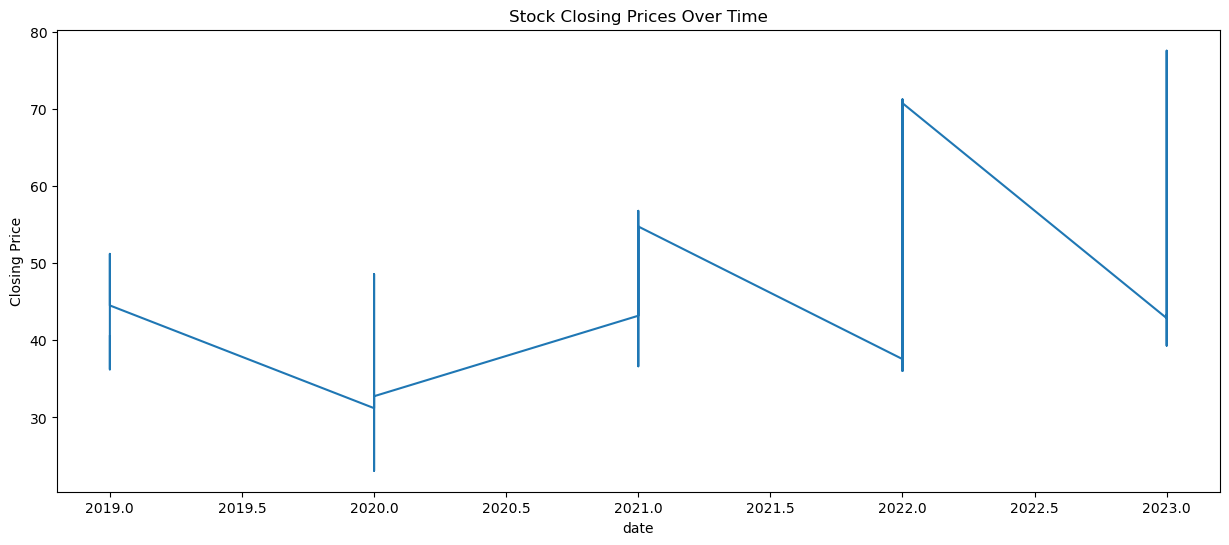

In [266]:
plt.figure(figsize=(15,6))
plt.plot(val_data.year, val_data.Close) 
plt.title('Stock Closing Prices Over Time')
plt.xlabel('date')  # Label for the x-axis
plt.ylabel('Closing Price')  # Label for the y-axis
plt.show() 

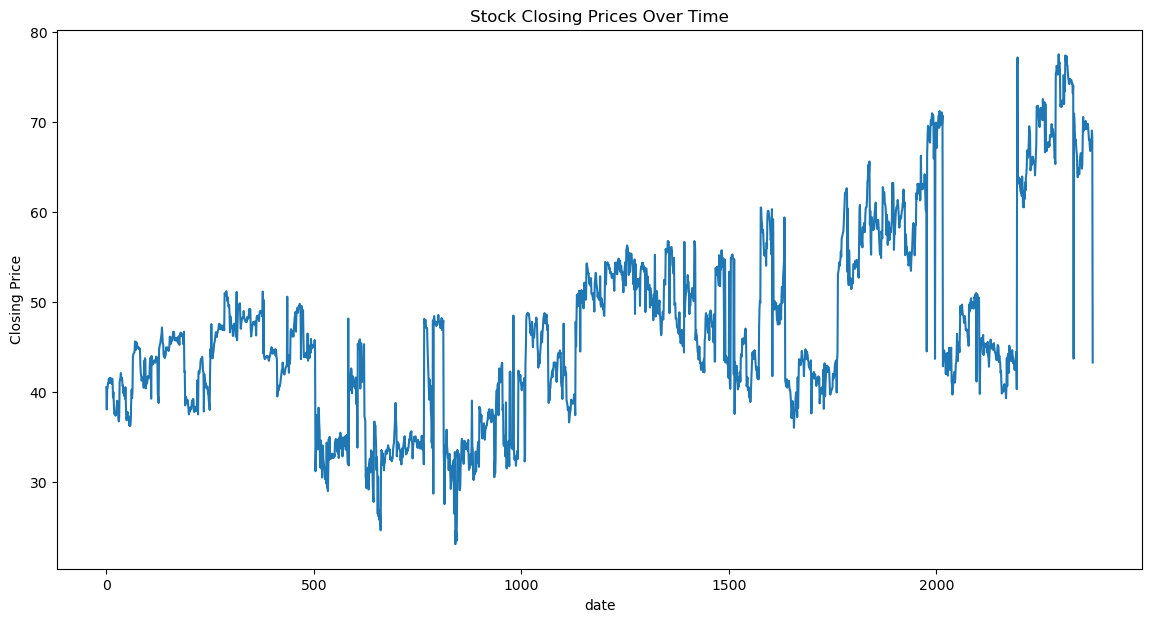

In [267]:
val_data['Close'].plot(figsize=(14, 7))
plt.title('Stock Closing Prices Over Time')
plt.xlabel('date')  # Label for the x-axis
plt.ylabel('Closing Price')  # Label for the y-axis
plt.show()

In [268]:
from statsmodels.tsa.arima.model import ARIMA
model2 = ARIMA(val_data['Close'], order=(5, 1, 0))
model_fit2 = model2.fit()

In [269]:
val_data['Close_lag1'] = val_data['Close'].shift(1)
val_data['Close_lag2'] = val_data['Close'].shift(2)
val_data.dropna(inplace=True)
val_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,time,year,Source,Close_lag1,Close_lag2
2,38.310441,40.513002,38.186600,40.229942,7858900,0.0,0.0,2019-09-09,04:00:00,2019,bk,38.062759,40.523132
3,40.486475,40.911065,40.061885,40.495319,5969900,0.0,0.0,2019-09-10,04:00:00,2019,bk,40.229942,38.062759
4,40.654534,41.008361,40.070722,40.990669,3986700,0.0,0.0,2019-09-11,04:00:00,2019,bk,40.495319,40.229942
5,40.804905,41.185267,40.442234,40.964127,3106600,0.0,0.0,2019-09-12,04:00:00,2019,bk,40.990669,40.495319
6,41.468324,41.724844,41.202955,41.486015,3209600,0.0,0.0,2019-09-13,04:00:00,2019,bk,40.964127,40.990669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,66.820900,67.586560,66.204403,67.149040,2960500,0.0,0.0,2023-06-21,04:00:00,2023,afl,67.158981,66.761238
2374,68.531195,68.610746,67.337968,67.417519,2914900,0.0,0.0,2023-06-20,04:00:00,2023,afl,67.149040,67.158981
2375,69.485781,69.883526,68.928942,69.038322,5587600,0.0,0.0,2023-06-16,04:00:00,2023,afl,67.417519,67.149040
2376,69.257079,69.823864,68.183170,68.372101,2470700,0.0,0.0,2023-06-14,04:00:00,2023,afl,69.038322,67.417519


In [270]:
val_data['Close_roll_mean'] = val_data['Close'].rolling(window=5).mean()
val_data['Close_roll_std'] = val_data['Close'].rolling(window=5).std()
val_data.dropna(inplace=True)
val_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date,time,year,Source,Close_lag1,Close_lag2,Close_roll_mean,Close_roll_std
6,41.468324,41.724844,41.202955,41.486015,3209600,0.0,0.0,2019-09-13,04:00:00,2019,bk,40.964127,40.990669,40.833215,0.486361
7,41.026045,41.574473,40.813748,41.353333,2811500,0.0,0.0,2019-09-16,04:00:00,2019,bk,41.486015,40.964127,41.057893,0.387419
8,40.185711,41.017200,40.123792,40.999508,4949200,0.0,0.0,2019-09-17,04:00:00,2019,bk,41.353333,41.486015,41.158730,0.243132
9,41.017206,41.786779,40.627999,41.574482,4656500,0.0,0.0,2019-09-18,04:00:00,2019,bk,40.999508,41.353333,41.275493,0.279683
10,41.530246,41.972528,41.264878,41.556782,3252500,0.0,0.0,2019-09-19,04:00:00,2019,bk,41.574482,40.999508,41.394024,0.237074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2373,66.820900,67.586560,66.204403,67.149040,2960500,0.0,0.0,2023-06-21,04:00:00,2023,afl,67.158981,66.761238,67.276318,0.500570
2374,68.531195,68.610746,67.337968,67.417519,2914900,0.0,0.0,2023-06-20,04:00:00,2023,afl,67.149040,67.158981,67.137108,0.236818
2375,69.485781,69.883526,68.928942,69.038322,5587600,0.0,0.0,2023-06-16,04:00:00,2023,afl,67.417519,67.149040,67.505020,0.888587
2376,69.257079,69.823864,68.183170,68.372101,2470700,0.0,0.0,2023-06-14,04:00:00,2023,afl,69.038322,67.417519,67.827193,0.842317


In [271]:
from sklearn.model_selection import train_test_split

features = ['Close_lag1', 'Close_lag2', 'Close_roll_mean', 'Close_roll_std']
X2 = val_data[features]
y2 = val_data['Close']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=False)

In [272]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error



xg_reg2 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xg_reg2.fit(X2_train, y2_train)

# Predict and evaluate
y2_pred_xgb = xg_reg2.predict(X2_test)
rmse_xgb2 = np.sqrt(mean_squared_error(y2_test, y2_pred_xgb))
print(f"XGBoost RMSE2: {rmse_xgb2}")

XGBoost RMSE2: 5.649324060881927


In [273]:
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
scaled_data2 = scaler2.fit_transform(val_data[['Close']])

# Create sequences for the CNN
def create_sequences(data, seq_length2):
    xs2, ys2 = [], []
    for i in range(len(data) - seq_length2):
        x2 = data[i:(i + seq_length2)]
        y2 = data[i + seq_length2]
        xs2.append(x2)
        ys2.append(y2)
    return np.array(xs2), np.array(ys2)

seq_length2 = 10
X2_seq, y2_seq = create_sequences(scaled_data2, seq_length2)

# Split into training and test sets
split2 = int(0.8 * len(X2_seq))
X2_train_seq, X2_test_seq = X2_seq[:split], X2_seq[split:]
y2_train_seq, y2_test_seq = y2_seq[:split], y2_seq[split:]

In [274]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [275]:
model2 = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(seq_length2, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model2.compile(optimizer='adam', loss='mean_squared_error')
model2.fit(X2_train_seq, y2_train_seq, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50


/Users/omolade/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0721 - val_loss: 0.0060
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - loss: 0.0073 - val_loss: 0.0047
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 712us/step - loss: 0.0062 - val_loss: 0.0034
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 0.0058 - val_loss: 0.0037
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 0.0053 - val_loss: 0.0034
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 0.0054 - val_loss: 0.0041
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.0052 - val_loss: 0.0030
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 0.0051 - val_loss: 0.0039
Epoch 9/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step - loss: 0.0048 - val_loss: 0.0029
Epoch 10/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - loss: 0.0044 - val_loss: 0.0038
Epoch 11/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 0.0045 - val_loss: 0.0036
Epoch 12/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 0.00

In [276]:
# Predict and evaluate
y2_pred_cnn = model2.predict(X2_test_seq)
y2_pred_cnn = scaler2.inverse_transform(y2_pred_cnn)

# Inverse transform y_test_seq for comparison
y2_test_seq_inv = scaler2.inverse_transform(y2_test_seq.reshape(-1, 1))

rmse_cnn2 = np.sqrt(mean_squared_error(y2_test_seq_inv, y2_pred_cnn))
print(f"CNN RMSE2: {rmse_cnn2}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
CNN RMSE2: 6.327261087176779


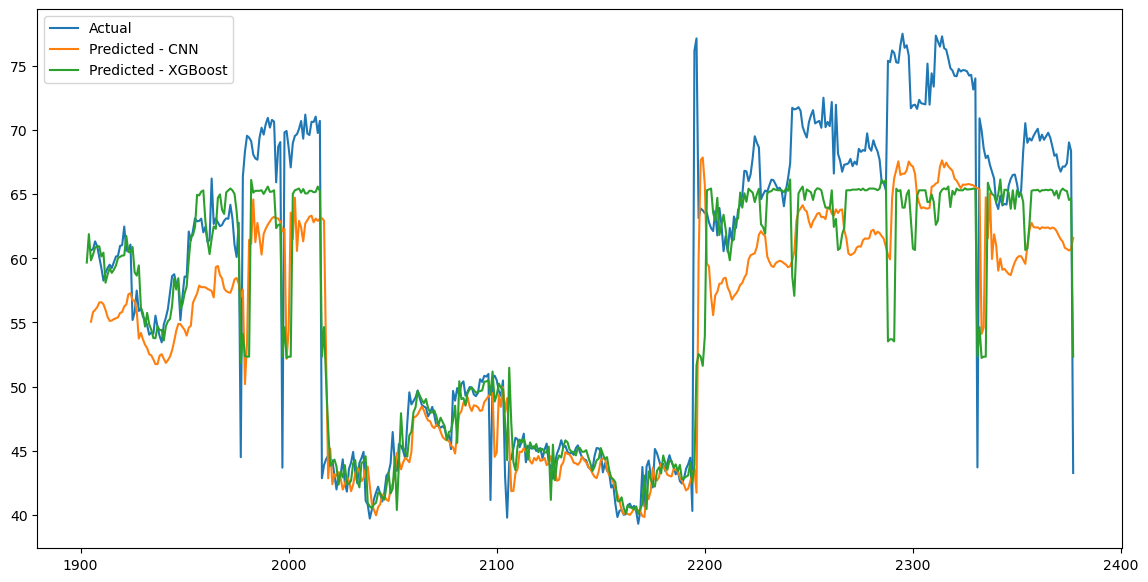

In [277]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(val_data.index[-len(y2_test_seq):], y2_test_seq_inv, label='Actual')
plt.plot(val_data.index[-len(y2_test_seq):], y2_pred_cnn, label='Predicted - CNN')
plt.plot(val_data.index[-len(y2_test):], y2_pred_xgb, label='Predicted - XGBoost')
plt.legend()
plt.show()

In [278]:
#calculating evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate evaluation metrics for CNN
mae_cnn2 = mean_absolute_error(y2_test_seq_inv, y2_pred_cnn)
mse_cnn2 = mean_squared_error(y2_test_seq_inv, y2_pred_cnn)
rmse_cnn2 = np.sqrt(mse_cnn2)

# Calculate evaluation metrics for XGBoost
mae_xgb2 = mean_absolute_error(y2_test, y2_pred_xgb)
mse_xgb2 = mean_squared_error(y2_test, y2_pred_xgb)
rmse_xgb2 = np.sqrt(mse_xgb2)

print(f'CNN MAE2: {mae_cnn2}, CNN RMSE2: {rmse_cnn2}')
print(f'XGBoost MAE2: {mae_xgb2}, XGBoost RMSE2: {rmse_xgb2}')

CNN MAE2: 4.7628884265085105, CNN RMSE2: 6.327261087176779
XGBoost MAE2: 3.429594108179996, XGBoost RMSE2: 5.649324060881927


In [283]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Calculate R-squared for CNN and XGBoost on finalstock
r2_cnn = r2_score(y_test_seq_inv, y_pred_cnn)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Calculate MAPE for CNN and XGBoost on finalstock
mape_cnn = mean_absolute_percentage_error(y_test_seq_inv, y_pred_cnn)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

# Calculate percentage accuracy
accuracy_cnn = 100 - mape_cnn * 100
accuracy_xgb = 100 - mape_xgb * 100

print(f'Finalstock CNN R-squared: {r2_cnn}, CNN MAPE: {mape_cnn}, CNN Accuracy: {accuracy_cnn}%')
print(f'Finalstock XGBoost R-squared: {r2_xgb}, XGBoost MAPE: {mape_xgb}, XGBoost Accuracy: {accuracy_xgb}%')

# Calculate R-squared for CNN and XGBoost on val_data
r2_cnn2 = r2_score(y2_test_seq_inv, y2_pred_cnn)
r2_xgb2 = r2_score(y2_test, y2_pred_xgb)

# Calculate MAPE for CNN and XGBoost on val_data
mape_cnn2 = mean_absolute_percentage_error(y2_test_seq_inv, y2_pred_cnn)
mape_xgb2 = mean_absolute_percentage_error(y2_test, y2_pred_xgb)

# Calculate percentage accuracy
accuracy_cnn2 = 100 - mape_cnn2 * 100
accuracy_xgb2 = 100 - mape_xgb2 * 100

print(f'Val_data CNN R-squared: {r2_cnn2}, CNN MAPE: {mape_cnn2}, CNN Accuracy: {accuracy_cnn2}%')
print(f'Val_data XGBoost R-squared: {r2_xgb2}, XGBoost MAPE: {mape_xgb2}, XGBoost Accuracy: {accuracy_xgb2}%')


Finalstock CNN R-squared: 0.7649713940634599, CNN MAPE: 0.06444975844263297, CNN Accuracy: 93.5550241557367%
Finalstock XGBoost R-squared: 0.763223420842296, XGBoost MAPE: 0.052869074020851184, XGBoost Accuracy: 94.71309259791488%
Val_data CNN R-squared: 0.7041952154818154, CNN MAPE: 0.07556855194905045, CNN Accuracy: 92.44314480509496%
Val_data XGBoost R-squared: 0.763223420842296, XGBoost MAPE: 0.052869074020851184, XGBoost Accuracy: 94.71309259791488%


In [286]:
# Finalstock
# XGBoost metrics for training set
y_train_pred_xgb = xg_reg.predict(X_train)
rmse_xgb_train = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
mae_xgb_train = mean_absolute_error(y_train, y_train_pred_xgb)
r2_xgb_train = r2_score(y_train, y_train_pred_xgb)

# XGBoost metrics for test set
y_test_pred_xgb = xg_reg.predict(X_test)
rmse_xgb_test = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
mae_xgb_test = mean_absolute_error(y_test, y_test_pred_xgb)
r2_xgb_test = r2_score(y_test, y_test_pred_xgb)

print(f'XGBoost Training RMSE: {rmse_xgb_train}, MAE: {mae_xgb_train}, R²: {r2_xgb_train}')
print(f'XGBoost Test RMSE: {rmse_xgb_test}, MAE: {mae_xgb_test}, R²: {r2_xgb_test}')


XGBoost Training RMSE: 0.34064206575611844, MAE: 0.25380372071052515, R²: 0.9980912839549775
XGBoost Test RMSE: 5.649324060881927, MAE: 3.429594108179996, R²: 0.763223420842296


In [288]:
#Val_data
# XGBoost metrics for validation training set
y2_train_pred_xgb = xg_reg2.predict(X2_train)
rmse_xgb2_train = np.sqrt(mean_squared_error(y2_train, y2_train_pred_xgb))
mae_xgb2_train = mean_absolute_error(y2_train, y2_train_pred_xgb)
r2_xgb2_train = r2_score(y2_train, y2_train_pred_xgb)

# XGBoost metrics for validation test set
y2_test_pred_xgb = xg_reg2.predict(X2_test)
rmse_xgb2_test = np.sqrt(mean_squared_error(y2_test, y2_test_pred_xgb))
mae_xgb2_test = mean_absolute_error(y2_test, y2_test_pred_xgb)
r2_xgb2_test = r2_score(y2_test, y2_test_pred_xgb)

print(f'Validation XGBoost Training RMSE: {rmse_xgb2_train}, MAE: {mae_xgb2_train}, R²: {r2_xgb2_train}')
print(f'Validation XGBoost Test RMSE: {rmse_xgb2_test}, MAE: {mae_xgb2_test}, R²: {r2_xgb2_test}')


Validation XGBoost Training RMSE: 0.34064206575611844, MAE: 0.25380372071052515, R²: 0.9980912839549775
Validation XGBoost Test RMSE: 5.649324060881927, MAE: 3.429594108179996, R²: 0.763223420842296
